## Section 8. Model Evaluation

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## 문제 1. ROC Curve 와 AUC 구하기

아래 코드는 
IRIS 데이터 셋을 이용해  Iris Versicolour 와 Iris Virginica 을 구별하는 코드 입니다. 

아래 코드를 수행 했을 때 나온 데이터프레임에는 각 데이터 별로 예측값과 정답값에 대한 정보가 담겨져 있습니다. 이를 이용해 **ROC Curve** 와 **AUC ** 을 구하고 시각화 합니다. 

참고 
- 음성 label 은 0 , Versicolour <br>
- 양성 label 은 1 , Virginica 입니다. 

In [0]:
# 우선 실행해주세요
np.random.seed(1) # 같은 결과를 보장하기 위함
# load Iris dataset 
iris = load_iris()

# XS, YS 
xs = iris['data']
ys = iris['target']
ys_name = iris['target_names']

# extract Versicolour , Virginica dataset 
indices = np.where((ys == 1) | (ys == 2))
xs = xs[indices]
ys = ys[indices]
ys = np.where(ys==1, 0, 1) 

# stop broadcasting
ys = ys.reshape([-1, 1])

# Normalization
xs_norm = (xs - xs.min(axis=0)) / (xs.max(axis=0) - xs.min(axis=0))

# Xs 와 np.ones 을 concatenate for broadcasting  
xs_concat = np.concatenate([xs_norm, 
                            np.ones(shape=[xs_norm.shape[0], 1])], 
                           axis=1)

# Weight 
weight = np.random.normal(size=[xs_concat.shape[-1], 1])

# Training 
lr = 0.01
for i in range(100):
    pred = np.matmul(xs_concat, weight)
    pred = 1 / (1 + np.exp(-pred))

    # Gradient Descent
    diff = pred - ys
    gradients = np.matmul(xs_concat.T, diff)
    weight = weight - gradients*lr
    
    # Accuracy 
    acc = np.mean((pred > 0.5) == ys)
print("Final Accuracy : {:2.2f}%".format(acc*100))
df = pd.DataFrame({
    "Prediction" : pred[:,0],
    "True Label" : ys[:,0]
})

Final Accuracy : 95.00%


In [0]:
df.sample(10)

,Prediction,True Label
69,0.511604,1
46,0.168278,0
58,0.814259,1
12,0.140934,0
73,0.647265,1
98,0.835785,1
31,0.081775,0
53,0.697934,1
65,0.862991,1
96,0.744327,1


#### 답안지 입력란
* 아래에 답을 서술하여 주세요


In [0]:
# 정답을 입력해주세요

## ROC curve
# label과 pred의 자료 준비
results = np.concatenate([ys, pred], axis=1)

# cut value예시와 결과 저장할 값 준비
cut_values = np.linspace(0.0, 1.0, 100)
tpr_list = []  # label이 양성인데, pred가 양성이라고 추정한 비율
fpr_list = []  # label은 음성인데, pred가 양성이라고 추정한 비율

# calculate confusion matrix value
def cal_confusion(cut_value):
    # 양성label은 1 Virginica, 음성label은 0 Versicolour
    # TP: label(ys)이 양성(1) 이고, pred가 cut_value보다 큰 것의 갯수
    TP = len(np.where((results[:,0]==1) & (results[:,1]>cut_value))[0])
    # FN: label(ys)이 양성(1) 이고, pred가 cut_value보다 작은 것의 갯수
    FN = len(np.where((results[:,0]==1) & (results[:,1]<cut_value))[0])
    # TN: label(ys)이 음성(0) 이고, pred가 cut_value보다 작은 것의 갯수
    TN = len(np.where((results[:,0]==0) & (results[:,1]<cut_value))[0])
    # FP: label(ys)이 음성(0) 이고, pred가 cut_value보다 큰 것의 갯수
    FP = len(np.where((results[:,0]==0) & (results[:,1]>cut_value))[0])
    return TP, FN, TN, FP

# calculate ROC
for cut_value in cut_values:
    TP_, FN_, TN_, FP_ = cal_confusion(cut_value)
    tpr = TP_ / (TP_ + FN_)     # 극대화하여야 할 값
    fpr = FP_ / (FP_ + TN_)     # 극소화하여야 할 값

    tpr_list.append(tpr)
    fpr_list.append(fpr)

    
# calcualte AUC
# set previous value for rectangle area
fpr_prev = fpr_list[0]
tpr_prev = tpr_list[0]

AUC = 0

for fpr_curr, tpr_curr in zip(fpr_list[1:], tpr_list[1:]):
    rec_area = (fpr_prev-fpr_curr)*(tpr_curr+tpr_prev)/2
    AUC += rec_area
    fpr_prev, tpr_prev = fpr_curr, tpr_curr    
    

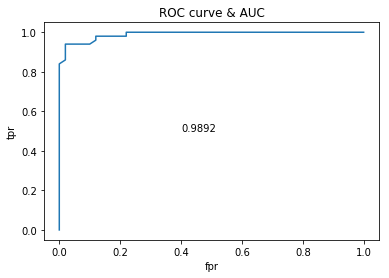

In [0]:
# show ROC curve, AUC
fig, ax = plt.subplots(facecolor='white')
fig = plt.plot(fpr_list, tpr_list)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve & AUC')
ax.text(0.4,0.5,np.around(AUC, decimals=4))
fig

#### 정답 확인

정답 : AUC , ROC curve 는 아래와 같은 그림이 나와야 정답입니다

![Imgur](https://i.imgur.com/nOOc7Va.png)